In [98]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import plotly.express as px

In [106]:


# Load the CSV file into a pandas DataFrame
csv_file_path = 'Data_collection/main_data/processed_data.csv'
data = pd.read_csv(csv_file_path)
data

,Unnamed: 0,Year,Apple iPhone model,review,data source,Category,processed_review
0,0,2022,iPhone 14 series,this is the iPhone 14 plus we haven't\nactuall...,Youtube,Camera,iphone 14 plus havent actually plus name iphon...
1,1,2022,iPhone 14 series,"So, Apple haven't used the Plus branding since...",Youtube,General,apple havent used plus branding since 2017 new...
2,2,2022,iPhone 14 series,"Well...\n...let's find out\nDesign\nSo, in ter...",Youtube,Camera,well lets find design terms design iphone 14 p...
3,3,2022,iPhone 14 series,Speaking of battery performance earlier\nthe i...,Youtube,Battery,speaking battery performance earlier iphone 14...
4,4,2022,iPhone 14 series,"Well, absolutely not at all\nbecause it is exa...",Youtube,Camera,well absolutely exactly type performance expec...
...,...,...,...,...,...,...,...
82082,82080,2018,iPhone XR and XS,No comments yet.,Blogs,General,comments yet
82083,82081,2018,iPhone XR and XS,Be the first to share your thoughts!,Blogs,General,first share thoughts
82084,82082,2018,iPhone XR and XS,Ultimate guides to kickstart your finances \nP...,Blogs,General,ultimate guides kickstart finances personal fi...
82085,82083,2018,iPhone XR and XS,Stay updated with the latest finance tips!,Blogs,General,stay updated latest finance tips


In [107]:
data = data[data.Year == '2022']
# Drop rows with NaN values in the 'corrected_review' column
data = data.dropna(subset=['processed_review'])
# Convert the processed reviews to a list of strings
documents = list(data['processed_review'])

In [109]:

# Calculate sentiment scores for each review
sentiment_scores = [TextBlob(review).sentiment.polarity for review in documents]

# Separate reviews into positive and negative based on sentiment scores
positive_reviews = [review for review, score in zip(documents, sentiment_scores) if score > 0]
negative_reviews = [review for review, score in zip(documents, sentiment_scores) if score < 0]

# Create a CountVectorizer to extract frequent features from positive reviews
positive_vectorizer = CountVectorizer(max_features=100, max_df=0.8, stop_words='english')
positive_X = positive_vectorizer.fit_transform(positive_reviews)

# Create a CountVectorizer to extract frequent features from negative reviews
negative_vectorizer = CountVectorizer(max_features=100, max_df=0.8, stop_words='english')
negative_X = negative_vectorizer.fit_transform(negative_reviews)

# Get the feature names for positive and negative reviews
positive_feature_names = positive_vectorizer.get_feature_names_out()
negative_feature_names = negative_vectorizer.get_feature_names_out()

# Display the most frequent positive and negative features
print("Most Frequent Positive Features:")
print(positive_feature_names)
print("=" * 40)
print("Most Frequent Negative Features:")
print(negative_feature_names)


Most Frequent Positive Features:
['12' '13' '14' '15' '16' 'action' 'actually' 'android' 'app' 'apple'
 'available' 'battery' 'best' 'better' 'big' 'buy' 'camera' 'cameras'
 'case' 'chip' 'day' 'design' 'device' 'display' 'don' 'dont' 'dynamic'
 'experience' 'feature' 'features' 'going' 'good' 'got' 'great' 'im'
 'image' 'ios' 'iphone' 'iphones' 'island' 'know' 'larger' 'latest' 'life'
 'light' 'like' 'lol' 'look' 'lot' 'love' 'main' 'make' 'makes' 'max'
 'mode' 'model' 'models' 'money' 'need' 'new' 'nice' 'old' 'people'
 'performance' 'phone' 'phones' 'photos' 'plus' 'price' 'pro' 'product'
 'quality' 'really' 'review' 'right' 'satellite' 'say' 'screen' 'sensor'
 'series' 'software' 'sure' 'thanks' 'thing' 'think' 'time' 'upgrade'
 'use' 'used' 'users' 'using' 've' 'video' 'videos' 'want' 'watch' 'way'
 'worth' 'year' 'years']
Most Frequent Negative Features:
['12' '13' '14' '15' '16' 'android' 'apple' 'bad' 'base' 'battery' 'big'
 'bit' 'black' 'boring' 'buy' 'buying' 'camera' 'chang

In [111]:
elements_to_remove = ['iphone', 'apple', 'phone', 'new', 'like', 'just', 'really', 'time',
                      'got', 'use', 'know', 'don', 've', 'want', 'make', 'think', 'way', 'need', 'good',
                      'better', 'thing', 'year','14','pro','max','mini','13','12','11','10','9','8','7','6','5','4','3',
                      'plus','best','screen','great','people','phones','years','light','feature']

In [112]:
# Sum the counts of each feature in positive reviews
positive_word_counts = positive_X.sum(axis=0)

# Sum the counts of each feature in negative reviews
negative_word_counts = negative_X.sum(axis=0)

# Convert the word counts to a list
positive_word_counts = positive_word_counts.tolist()[0]
negative_word_counts = negative_word_counts.tolist()[0]

# Create a dictionary to map words to their counts
positive_word_count_dict = dict(zip(positive_feature_names, positive_word_counts))
negative_word_count_dict = dict(zip(negative_feature_names, negative_word_counts))


In [113]:
positive_word_count_dict = {key: value for key, value in positive_word_count_dict.items() if key not in elements_to_remove}
negative_word_count_dict = {key: value for key, value in negative_word_count_dict.items() if key not in elements_to_remove}

In [114]:
positive_percentage = len(positive_reviews)/(len(positive_reviews)+len(negative_reviews)) * 100
negative_percentage = len(negative_reviews)/(len(positive_reviews)+len(negative_reviews)) * 100


In [115]:
# Create a DataFrame for the pie chart
data = pd.DataFrame({'Sentiment': ['Positive', 'Negative'], 'Percentage': [positive_percentage, negative_percentage]})

# Create the pie plot
fig = px.pie(data, names='Sentiment', values='Percentage', title='Sentiment Distribution')

# Show the plot
fig.show()

In [116]:
# Create a DataFrame from the positive_word_count_dict
df_positive_word_counts = pd.DataFrame.from_dict(positive_word_count_dict, orient='index', columns=['Count'])

# Sort the DataFrame by word count in descending order
df_positive_word_counts = df_positive_word_counts.sort_values(by='Count', ascending=False).head(20)

# Calculate the percentage of each word count with respect to the total word count
total_positive_word_count = df_positive_word_counts['Count'].sum()
df_positive_word_counts['Percentage'] = (df_positive_word_counts['Count'] / total_positive_word_count) * 100

# Take the top 10 positive features
top_10_positive_features = df_positive_word_counts

# Display the DataFrame with the top 10 positive features and their percentages
print("Top 10 Positive Features and Their Percentages:")
print(top_10_positive_features)

Top 10 Positive Features and Their Percentages:
             Count  Percentage
camera        1396   14.268193
battery        988   10.098119
display        685    7.001226
video          607    6.204007
features       522    5.335241
life           495    5.059280
ios            429    4.384710
upgrade        427    4.364268
models         425    4.343827
performance    389    3.975879
mode           369    3.771464
iphones        352    3.597711
dynamic        348    3.556827
watch          347    3.546607
dont           344    3.515944
buy            344    3.515944
love           336    3.434178
design         331    3.383074
photos         327    3.342191
island         323    3.301308


In [117]:
import pandas as pd

# Create a DataFrame from the negative_word_count_dict
df_negative_word_counts = pd.DataFrame.from_dict(negative_word_count_dict, orient='index', columns=['Count'])

# Sort the DataFrame by word count in descending order
df_negative_word_counts = df_negative_word_counts.sort_values(by='Count', ascending=False).head(20)

# Calculate the percentage of each word count with respect to the total word count
total_negative_word_count = df_negative_word_counts['Count'].sum()
df_negative_word_counts['Percentage'] = (df_negative_word_counts['Count'] / total_negative_word_count) * 100

# Take the top 10 negative features
top_10_negative_features = df_negative_word_counts

# Display the DataFrame with the top 10 negative features and their percentages
print("Top 10 Negative Features and Their Percentages:")
print(top_10_negative_features)


Top 10 Negative Features and Their Percentages:
         Count  Percentage
game       396   14.732143
battery    285   10.602679
camera     179    6.659226
playing    147    5.468750
video      123    4.575893
display    121    4.501488
ios        120    4.464286
bad        118    4.389881
little     118    4.389881
models     117    4.352679
life       110    4.092262
buy        109    4.055060
base       104    3.869048
model      104    3.869048
upgrade     98    3.645833
long        97    3.608631
15          87    3.236607
island      86    3.199405
im          86    3.199405
small       83    3.087798


Top 10 Positive Features and Their Percentages:
             Count  Percentage
camera        1396   14.268193
battery        988   10.098119
display        685    7.001226
video          607    6.204007
features       522    5.335241
life           495    5.059280
ios            429    4.384710
upgrade        427    4.364268
models         425    4.343827
performance    389    3.975879
mode           369    3.771464
iphones        352    3.597711
dynamic        348    3.556827
watch          347    3.546607
dont           344    3.515944
buy            344    3.515944
love           336    3.434178
design         331    3.383074
photos         327    3.342191
island         323    3.301308


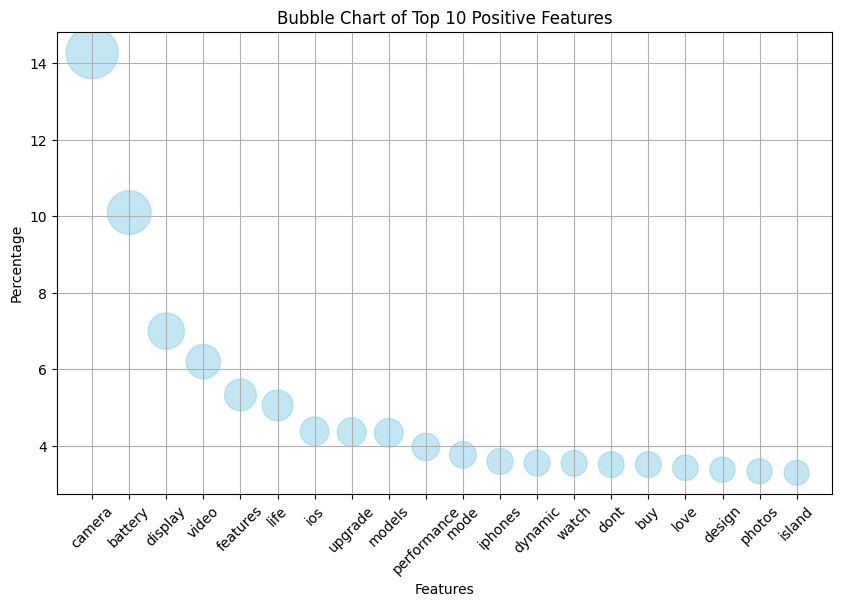

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the positive_word_count_dict
df_positive_word_counts = pd.DataFrame.from_dict(positive_word_count_dict, orient='index', columns=['Count'])

# Sort the DataFrame by word count in descending order
df_positive_word_counts = df_positive_word_counts.sort_values(by='Count', ascending=False).head(20)

# Calculate the percentage of each word count with respect to the total word count
total_positive_word_count = df_positive_word_counts['Count'].sum()
df_positive_word_counts['Percentage'] = (df_positive_word_counts['Count'] / total_positive_word_count) * 100

# Take the top 10 positive features
top_10_positive_features = df_positive_word_counts

# Display the DataFrame with the top 10 positive features and their percentages
print("Top 10 Positive Features and Their Percentages:")
print(top_10_positive_features)

# Create a bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(top_10_positive_features.index, top_10_positive_features['Percentage'], s=top_10_positive_features['Count'], c='skyblue', alpha=0.5)
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.title('Bubble Chart of Top 10 Positive Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()
